# Data Visualisations

# CPPN-NEAT vs ES-HyperNEAT

In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Opens CPPN-NEAT and HyperNEAT run files
with open("result data/NEAT-250.pickle", "rb") as f:
    neat = pickle.load(f)

with open("result data/HYPERNEAT-250-FINAL.pickle", "rb") as f:
    es_hyperneat = pickle.load(f)

## Highest Fitness Xenobot in Each Generation

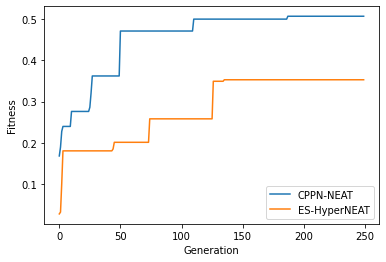

In [3]:
y = list(range(len(neat["best_each_gen"])))

plt.plot(y, neat["best_each_gen"])
plt.plot(y, es_hyperneat["best_each_gen"])
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(["CPPN-NEAT", "ES-HyperNEAT"])


## Standard Deviation of Fitness in Each Generation

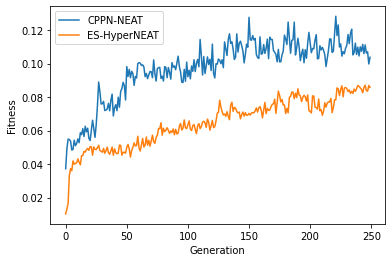

In [4]:
y = list(range(len(neat["std_dev"])))

plt.plot(y, neat["std_dev"])
plt.plot(y, es_hyperneat["std_dev"])

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(["CPPN-NEAT", "ES-HyperNEAT"])

## Mean Fitness

True


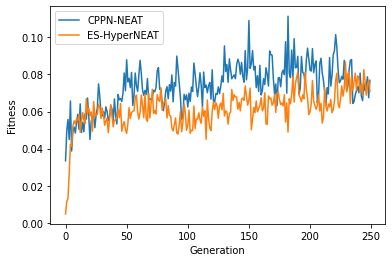

In [5]:
y = list(range(len(neat["mean"])))

plt.plot(y, neat["mean"])
plt.plot(y, es_hyperneat["mean"])

neat_50 = neat["mean"][50]
hyper_50 = es_hyperneat["mean"][50]

neat_m = (neat["mean"][-1] - neat_50) / (250 - 50)
hyper_m = (es_hyperneat["mean"][-1] - hyper_50) / (250 - 50)

print(neat_m < hyper_m)

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(["CPPN-NEAT", "ES-HyperNEAT"])

# Clustering of Xenobots

In [1]:
import json
import umap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import umap.plot
from tools.clustering import choose_num_clusters
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

2023-04-20 12:08:14.044537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-20 12:08:14.044554: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## By Structure

### Load dataset

In [2]:
f = open("motif_data.json")
data = json.load(f)

f.close()

motifs = data["motifs"]
xenobots = data["xenobots"]
    
df = pd.DataFrame(xenobots)

df = pd.json_normalize(df["motif_counts"])
    
df

,2429,3266,578,315,4365,4858,3755,259,3954,2159,...,3763,1887,4743,2130,4527,4757,2275,2857,2539,2540
0,2.0,12.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478595,2.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
motifs

{'0': '000111000000100011001000111',
 '1': '000100011001000110011000100',
 '2': '110111111111111111111011111',
 '3': '011000111111000000111011000',
 '4': '222222222222222022222222000',
 '5': '100000000110100000111100000',
 '6': '111222111112222111112221111',
 '7': '221122222221122222221122222',
 '8': '111112221111222111122211111',
 '9': '111111000111111000111111111',
 '10': '222222222222222222000220222',
 '11': '000001011011111111111111111',
 '12': '111122221111122211111122211',
 '13': '000100111000000000111000000',
 '14': '111000000000111000111000111',
 '15': '111111110111111111111111110',
 '16': '111111122111112222111222222',
 '17': '110011000000111000000100011',
 '18': '000000100000000000000000000',
 '19': '111110000000111000000111000',
 '20': '011011001011011001111011011',
 '21': '111122222111112222111112222',
 '22': '000222022002000222222002000',
 '23': '211111011211111011211111111',
 '24': '222111000222111011222111111',
 '25': '000100111111000100000111000',
 '26': '00000000000200

### Preprocessing

Drop last 428600 rows

In [3]:
df.drop(df.tail(428600).index, inplace=True)

Replace NaN with 0s

In [4]:
df = df.fillna(0)

df

,2429,3266,578,315,4365,4858,3755,259,3954,2159,...,3763,1887,4743,2130,4527,4757,2275,2857,2539,2540
0,2.0,12.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dimensionality Reduction

In [5]:
reduced = umap.UMAP(random_state=0, n_components=5).fit(df)
reduced_embedding = reduced.embedding_
reduced = pd.DataFrame(reduced.embedding_)

reduced

,0,1,2,3,4
0,7.943867,2.906075,6.336430,9.578365,2.873148
1,7.273149,13.642904,4.909186,5.017241,-1.283347
2,6.978176,2.004061,3.717762,4.703365,0.808732
3,7.657124,5.077399,4.437333,13.575477,-0.218582
4,6.740560,10.060383,6.409687,4.747088,7.860538
...,...,...,...,...,...
49995,6.959313,9.928056,6.504022,4.752985,7.502515
49996,6.589849,1.009399,13.578527,-1.886560,-4.359006
49997,6.544333,0.330907,15.123579,0.168143,-5.143355
49998,7.084404,5.301708,6.470180,5.442652,6.335720


### Various algorithms

K-means

Choose optimal number of clusters using silhouette coefficient

/home/cameron/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cameron/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cameron/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cameron/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cameron/.local/lib/python3

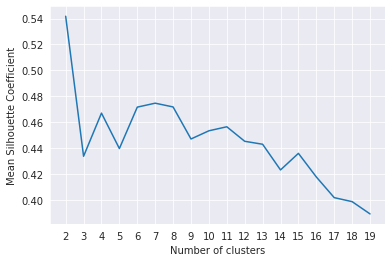

In [32]:
clusters, labels, score = choose_num_clusters(reduced, num_clusters=20, plot=True)

In [33]:
f"clusters: {clusters}. silhouette score: {score}."


'clusters: 2. silhouette score: 0.5418261289596558.'

Run k-means

In [7]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(reduced)

/home/cameron/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hierarchical Clustering

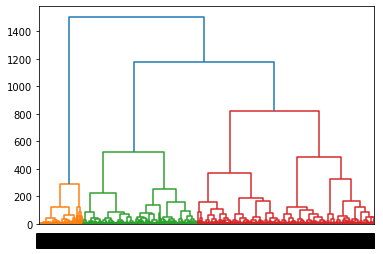

In [6]:
linkage_data = linkage(reduced, method="ward", metric="euclidean")
dendrogram(linkage_data)

plt.show()


In [6]:
hierarchical_cluster = AgglomerativeClustering(distance_threshold=600, n_clusters=None)
hierarchical_labels = hierarchical_cluster.fit_predict(reduced)

Visualisation of Clustering

In [ ]:
# random_state=29 
mapper = umap.UMAP(random_state=29).fit(df)

/usr/local/lib/python3.8/dist-packages/umap/plot.py:435: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

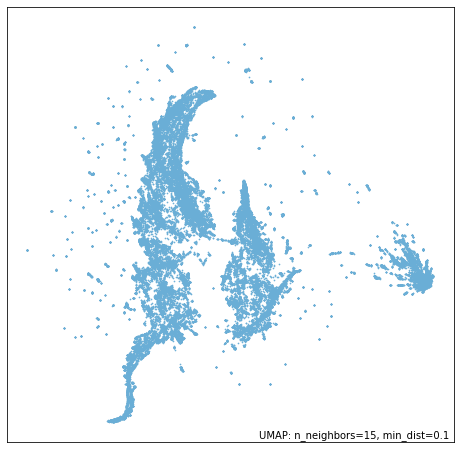

In [ ]:
umap.plot.points(mapper)

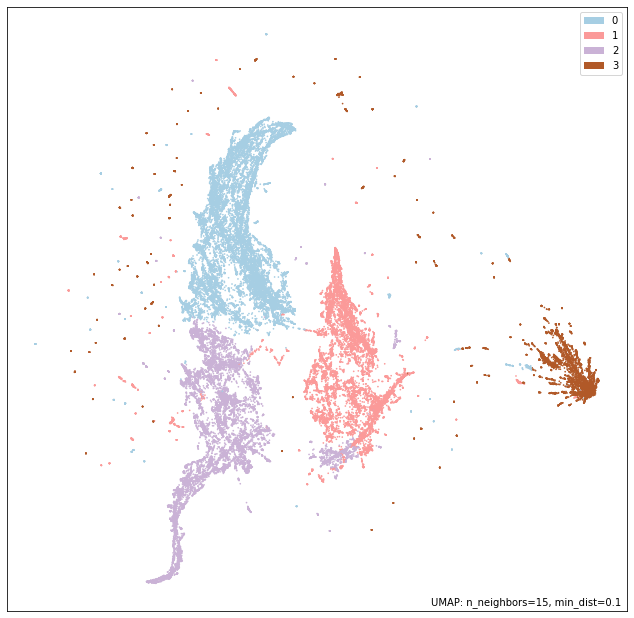

In [ ]:
ax = umap.plot.points(mapper, labels=hierarchical_labels, color_key_cmap='Paired', background="white")


## Structure Cluster Analysis

Add cluster labels to original dataset

In [7]:
df["structure"] = hierarchical_labels

In [ ]:
df

,2429,3266,578,315,4365,4858,3755,259,3954,2159,...,1887,4743,2130,4527,4757,2275,2857,2539,2540,structure
0,2.0,12.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
49998,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


Find maximally different substructures

Mean of each cluster

In [28]:
mean_vals = df.groupby(["structure"]).mean()
mean_vals

,2429,3266,578,315,4365,4858,3755,259,3954,2159,...,3763,1887,4743,2130,4527,4757,2275,2857,2539,2540
structure,,,,,,,,,,,,,,,,,,,,,
0,0.184766,2.451884,0.951184,0.084451,0.074770,0.048408,0.047766,0.041759,0.013356,0.023562,...,0.000583,0.000000,0.000000,0.002333,0.002450,0.000000,0.000817,0.000000,0.000000,0.000000
1,0.009150,0.070656,0.036123,0.003501,0.008991,0.004535,0.002785,0.002467,0.000875,0.005251,...,0.006206,0.008116,0.005808,0.000000,0.002626,0.000000,0.003183,0.003342,0.001034,0.000716
2,0.244766,2.635214,0.942716,0.062882,0.164510,0.075821,0.066298,0.070079,0.014830,0.067752,...,0.000000,0.000945,0.001018,0.000000,0.002181,0.000000,0.000000,0.000727,0.000000,0.000000
3,0.005513,0.019142,0.004135,0.001685,0.003982,0.000459,0.000459,0.004288,0.001072,0.003216,...,0.000459,0.000153,0.000000,0.024196,0.000306,0.006585,0.012557,0.003063,0.018989,0.012557


Ratio of mean of cluster / total mean

In [26]:
df_no_label = df.drop("structure", axis=1)

total_mean = df_no_label.mean()
total_mean

2429    0.13372
3266    1.58606
578     0.59516
315     0.04736
4365    0.07368
         ...   
4757    0.00086
2275    0.00272
2857    0.00144
2539    0.00274
2540    0.00182
Length: 5035, dtype: float64

In [29]:
result = mean_vals / total_mean

result

,2429,3266,578,315,4365,4858,3755,259,3954,2159,...,3763,1887,4743,2130,4527,4757,2275,2857,2539,2540
structure,,,,,,,,,,,,,,,,,,,,,
0,1.381739,1.545896,1.598199,1.783175,1.014789,1.252142,1.350092,1.200662,1.480697,0.827911,...,0.320454,0.000000,0.000000,0.589118,1.144650,0.000000,0.300190,0.000000,0.000000,0.000000
1,0.068428,0.044548,0.060695,0.073922,0.122029,0.117313,0.078713,0.070920,0.097033,0.184520,...,3.410021,3.498211,3.338162,0.000000,1.226970,0.000000,1.170105,2.320709,0.377508,0.393464
2,1.830436,1.661484,1.583971,1.327738,2.232764,1.961238,1.873893,2.014908,1.644112,2.380613,...,0.000000,0.407346,0.584907,0.000000,1.019097,0.000000,0.000000,0.504830,0.000000,0.000000
3,0.041228,0.012069,0.006947,0.035569,0.054039,0.011884,0.012985,0.123286,0.118844,0.112998,...,0.252428,0.066008,0.000000,6.110106,0.143121,7.656968,4.616701,2.126936,6.930394,6.899685


In [30]:
result.sort_values(axis=1, by=[0], ascending=[False])

,913,1422,2952,866,1013,813,51,4131,3940,2695,...,1387,2349,2742,2863,2804,4769,4248,165,2645,2540
structure,,,,,,,,,,,,,,,,,,,,,
0,2.916132,2.916132,2.916132,2.916132,2.916132,2.916132,2.916132,2.916132,2.916132,2.916132,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.061840,3.742353,0.032084,0.006245,0.00000,0.000000,0.000000,0.000000,0.035841,0.393464
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.178914,0.215622,0.000000,0.005706,0.29551,0.268339,0.306832,0.123445,0.589423,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.161050,0.000000,7.595218,7.632927,7.03445,7.091688,7.010600,7.396920,6.346316,6.899685


In [31]:
result.sort_values(axis=1, by=[1], ascending=[False])

,318,28,2236,2522,1368,2597,1876,379,4208,1034,...,487,3392,1196,2234,4688,1334,4252,4969,3698,3939
structure,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.011004,0.000000,0.000000,0.000000,0.029756,0.030940,...,0.000000,0.000000,0.000000,0.000000,0.350813,2.066398,2.818385,1.501375,0.000000,2.892032
1,3.978358,3.978358,3.978358,3.978358,3.963345,3.949319,3.946013,3.941350,3.937762,3.936147,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.026531,0.029551,0.033812,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.469392,0.000000,0.071976,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.656968,7.656968,7.656968,7.656968,6.735829,1.242356,0.256658,3.563143,7.656968,0.063281


In [32]:
result.sort_values(axis=1, by=[2], ascending=[False])

,642,1523,762,158,3429,1957,2414,1064,3136,1213,...,833,4945,3294,202,4083,3857,4574,1959,4519,2540
structure,,,,,,,,,,,,,,,,,,,,,
0,0.088368,0.364517,0.127157,0.373073,0.306961,0.373863,0.450459,0.231439,0.406902,0.399673,...,2.916132,2.903398,2.896691,2.890017,2.867204,2.832814,2.916132,0.000000,0.017358,0.000000
1,0.180834,0.087758,0.439470,0.065372,0.235561,0.153014,0.064689,0.315743,0.154200,0.181752,...,0.000000,0.017373,0.026522,0.011876,0.013350,0.056834,0.000000,3.563108,0.852505,0.393464
2,3.084054,3.046799,3.043070,3.037514,3.036952,3.028981,3.014206,3.000134,2.986716,2.970554,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.580073,0.112602,0.066776,0.152780,0.000000,0.000000,0.000000,0.121539,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.045713,0.102778,0.109385,0.000000,0.799212,5.970612,6.899685


In [33]:
pd.set_option('max_colwidth', 800)
result.sort_values(axis=1, by=[3], ascending=[False])

,152,2721,4027,4132,670,4664,1038,4986,1779,4125,...,4435,4260,1147,3341,765,4906,2787,2349,274,5005
structure,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.161193,0.095091,0.064516,1.756307,0.000000,0.416590,2.904514
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.558420,3.038019,3.238198,3.758449,3.848629,3.890341,0.271252,3.742353,2.803795,0.015850
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.383671,0.859129,0.676238,0.000000,0.000000,0.000000,1.197824,0.215622,0.553871,0.000000
3,7.656968,7.656968,7.656968,7.656968,7.656968,7.656968,7.656968,7.656968,7.656968,7.656968,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
(result>1).sum(axis=1)

structure
0    2049
1    1910
2    1383
3    1458
dtype: int64

Visualise 3x3x3 motifs

In [66]:
motifs["1422"]

'011111111111011111111111111'

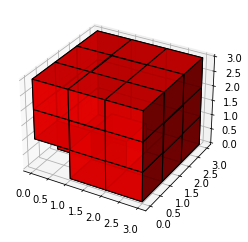

In [67]:
from visualise_xenobot import show

show(motifs["1422"], [3,3,3])

TODO: SORT THIS

## By Behaviour 

In [8]:
import umap
import umap.plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
df_behaviour = pd.read_csv("frequency-components.csv")

df_behaviour = df_behaviour.astype(np.complex128)

df_behaviour

,X1,X2,X3,X4,Y1,Y2,Y3,Y4,Z1,Z2,Z3,Z4
0,-6.678392-0.000000j,-3.8136350+3.0059540j,-0.3504550+0.2406800j,-3.0898130-4.0575450j,-33.550251-36.060602j,-38.443789+12.618289j,2.416319+29.696325j,25.474944-1.041319j,-33.550251+36.060602j,15.119171+46.437247j,37.853622+5.996515j,8.471582-23.156516j
1,0.000000+0.000000j,0.0000000+0.0000000j,0.0000000+0.0000000j,0.0000000+0.0000000j,0.0000000+0.0000000j,0.0000000+0.0000000j,0.0000000+0.0000000j,0.0000000+0.0000000j,0.0000000+0.0000000j,0.0000000+0.0000000j,0.0000000+0.0000000j,0.0000000+0.0000000j
2,-4.795769-0.000000j,-4.0267200+1.4727800j,-2.3208520+1.6914190j,-1.1656710+0.3585130j,-10.120769-19.201116j,-18.474813-7.801353j,-16.208672+6.543446j,-4.229451+14.842446j,-10.120769+19.201116j,2.968563+21.721470j,13.603613+15.075739j,16.741879+3.704786j
3,-19.392116-0.000000j,-19.983327+0.510990j,-21.513332+1.791514j,-23.511298+4.409955j,9.6468880-1.5940620j,8.8862690-1.1053580j,9.5950540+0.1543860j,12.126948+1.085019j,9.6468880+1.5940620j,10.999838+0.589620j,11.815608-1.963056j,11.260627-5.516614j
4,-0.613462-0.000000j,-1.9707600-2.5898450j,-4.7606970-2.9063840j,-6.3582230-0.9397350j,-21.263462-45.559598j,-43.314370-20.649078j,-41.803128+12.310863j,-18.487917+33.909887j,-21.263462+45.559598j,11.177166+48.101227j,34.934814+28.358522j,37.687755-0.056049j
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-13.493182-0.000000j,-11.995158+4.547003j,-8.0175930+7.1445040j,-3.7221650+6.2078950j,-21.087500-27.111188j,-29.176466-22.430292j,-36.774191-11.200165j,-38.493825+4.851192j,-21.087500+27.111188j,-16.858461+31.704628j,-9.871497+39.666822j,4.232678+46.485603j
9996,28.233937-0.000000j,-20.352130+14.062991j,3.985085+16.710827j,11.766553+1.196473j,-9.272851-032.0586150j,-47.378766+31.690538j,-10.557953+40.192694j,18.943663+24.708864j,-9.272851+032.0586150j,-4.872937+57.365085j,31.148189+45.002767j,45.266700+4.788833j
9997,-94.913333-0.000000j,-4.248174-44.908619j,2.389781-15.392873j,6.328453-15.190233j,-134.592157-39.897621j,-30.283235+14.379630j,-17.392218+10.275036j,-9.8503150+4.6112340j,-134.592157+39.897621j,53.478222+28.275272j,36.845603+30.406685j,38.236558+18.886513j
9998,-26.072549-0.000000j,-24.223263+8.184877j,-19.096436+14.669182j,-11.877910+18.143691j,-22.185784-37.027680j,-32.118246-24.729546j,-36.013242-9.764637j,-33.429040+4.978859j,-22.185784+37.027680j,-7.922619+44.265959j,8.069417+45.056976j,22.835847+39.325535j


## Preprocessing

Split into real and imaginary parts for clustering

In [10]:
for col in df_behaviour.columns:
    df_behaviour[f'{col}_real_part'] = df_behaviour[col].apply(lambda x: np.real(x))
    df_behaviour[f'{col}_imaginary_part'] = df_behaviour[col].apply(lambda x: np.imag(x))
    df_behaviour = df_behaviour.drop(columns=[col]) 

df_behaviour

,X1_real_part,X1_imaginary_part,X2_real_part,X2_imaginary_part,X3_real_part,X3_imaginary_part,X4_real_part,X4_imaginary_part,Y1_real_part,Y1_imaginary_part,...,Y4_real_part,Y4_imaginary_part,Z1_real_part,Z1_imaginary_part,Z2_real_part,Z2_imaginary_part,Z3_real_part,Z3_imaginary_part,Z4_real_part,Z4_imaginary_part
0,-6.678392,-0.0,-3.813635,3.005954,-0.350455,0.240680,-3.089813,-4.057545,-33.550251,-36.060602,...,25.474944,-1.041319,-33.550251,36.060602,15.119171,46.437247,37.853622,5.996515,8.471582,-23.156516
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-4.795769,-0.0,-4.026720,1.472780,-2.320852,1.691419,-1.165671,0.358513,-10.120769,-19.201116,...,-4.229451,14.842446,-10.120769,19.201116,2.968563,21.721470,13.603613,15.075739,16.741879,3.704786
3,-19.392116,-0.0,-19.983327,0.510990,-21.513332,1.791514,-23.511298,4.409955,9.646888,-1.594062,...,12.126948,1.085019,9.646888,1.594062,10.999838,0.589620,11.815608,-1.963056,11.260627,-5.516614
4,-0.613462,-0.0,-1.970760,-2.589845,-4.760697,-2.906384,-6.358223,-0.939735,-21.263462,-45.559598,...,-18.487917,33.909887,-21.263462,45.559598,11.177166,48.101227,34.934814,28.358522,37.687755,-0.056049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-13.493182,-0.0,-11.995158,4.547003,-8.017593,7.144504,-3.722165,6.207895,-21.087500,-27.111188,...,-38.493825,4.851192,-21.087500,27.111188,-16.858461,31.704628,-9.871497,39.666822,4.232678,46.485603
9996,28.233937,-0.0,-20.352130,14.062991,3.985085,16.710827,11.766553,1.196473,-9.272851,-32.058615,...,18.943663,24.708864,-9.272851,32.058615,-4.872937,57.365085,31.148189,45.002767,45.266700,4.788833
9997,-94.913333,-0.0,-4.248174,-44.908619,2.389781,-15.392873,6.328453,-15.190233,-134.592157,-39.897621,...,-9.850315,4.611234,-134.592157,39.897621,53.478222,28.275272,36.845603,30.406685,38.236558,18.886513
9998,-26.072549,-0.0,-24.223263,8.184877,-19.096436,14.669182,-11.877910,18.143691,-22.185784,-37.027680,...,-33.429040,4.978859,-22.185784,37.027680,-7.922619,44.265959,8.069417,45.056976,22.835847,39.325535


Dimensionality reduction to five dimensions

In [11]:
reduced_behaviour = umap.UMAP(random_state=0, n_components=5).fit(df_behaviour)
reduced_behaviour = pd.DataFrame(reduced_behaviour.embedding_)

reduced_behaviour

,0,1,2,3,4
0,1.168825,11.603789,4.680552,4.736001,4.694520
1,7.835464,7.210242,7.407794,6.236577,2.783442
2,3.740284,9.221956,5.596544,8.261011,5.800113
3,1.949477,3.244502,5.034820,7.303501,3.218468
4,-0.899763,11.406188,5.029568,5.837349,5.617651
...,...,...,...,...,...
9995,-1.139019,9.021712,3.871099,8.846560,3.993223
9996,0.435836,11.377814,4.311238,5.405053,4.486152
9997,0.877701,7.697239,4.766288,5.793615,2.784258
9998,-1.422668,8.204662,2.854635,8.416161,3.675832


## Clustering

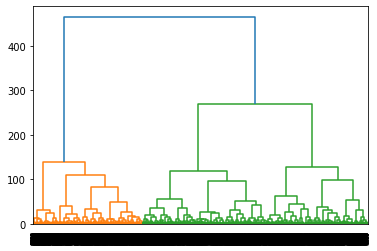

In [16]:
linkage_data = linkage(reduced_behaviour, method="ward", metric="euclidean")
dendrogram(linkage_data)

plt.show()

Hierarchical

In [12]:
from sklearn.metrics import silhouette_score
hierarchical_cluster = AgglomerativeClustering(distance_threshold=160, n_clusters=None)
hierarchical_labels_behaviour = hierarchical_cluster.fit_predict(reduced_behaviour)

silhouette_score(reduced_behaviour, hierarchical_labels_behaviour)

0.42466488

In [13]:
reduced_behaviour["behaviour"] = hierarchical_labels_behaviour
reduced_behaviour

,0,1,2,3,4,behaviour
0,1.168825,11.603789,4.680552,4.736001,4.694520,2
1,7.835464,7.210242,7.407794,6.236577,2.783442,0
2,3.740284,9.221956,5.596544,8.261011,5.800113,0
3,1.949477,3.244502,5.034820,7.303501,3.218468,1
4,-0.899763,11.406188,5.029568,5.837349,5.617651,2
...,...,...,...,...,...,...
9995,-1.139019,9.021712,3.871099,8.846560,3.993223,2
9996,0.435836,11.377814,4.311238,5.405053,4.486152,2
9997,0.877701,7.697239,4.766288,5.793615,2.784258,1
9998,-1.422668,8.204662,2.854635,8.416161,3.675832,2


## UMAP cluster visualisation

In [10]:
# random_state=29 
mapper_behaviour = umap.UMAP(random_state=29).fit(df_behaviour)

/usr/local/lib/python3.8/dist-packages/umap/plot.py:435: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

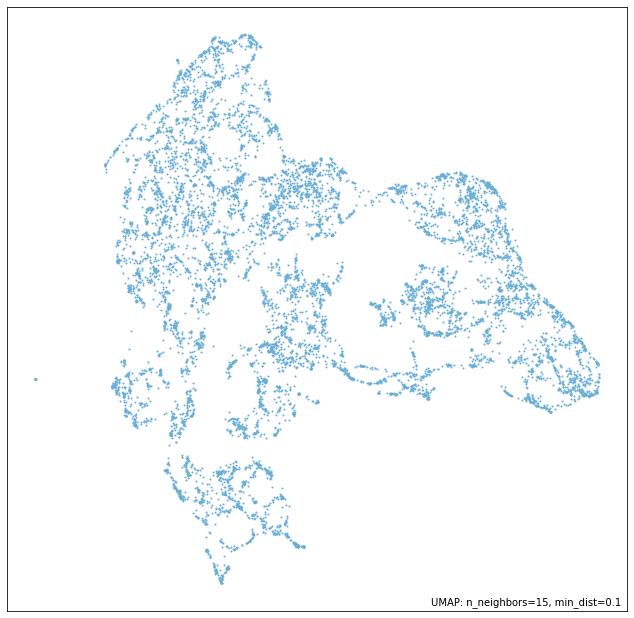

In [61]:
umap.plot.points(mapper_behaviour)

Clustering label visualisation

<Axes: >

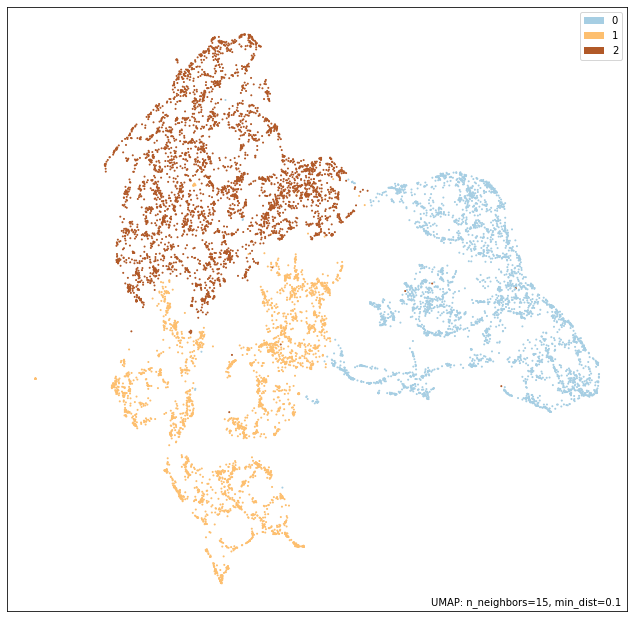

In [18]:
umap.plot.points(mapper_behaviour, labels=hierarchical_labels_behaviour, color_key_cmap='Paired')

## Comparison of Behaviour and Structure

In [14]:
from gp_map import load

fitnesses = load("10k-phenotypes-fitnesses.pickle")

df["structure"] = hierarchical_labels

comparison_df = df.drop(df.tail(40000).index)

comparison_df["fitness"] = fitnesses

comparison_df

,2429,3266,578,315,4365,4858,3755,259,3954,2159,...,4743,2130,4527,4757,2275,2857,2539,2540,structure,fitness
0,2.0,12.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.038354
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.000000
2,0.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.015755
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.008543
4,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.036749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.024924
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.030516
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.125151
9998,2.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.031412


In [15]:
comparison_df["behaviour"] = hierarchical_labels_behaviour

comparison_df["structure"] = comparison_df["structure"].astype(str)
comparison_df["behaviour"] = comparison_df["behaviour"].astype(str)

comparison_df = comparison_df.iloc[:, -3:]
comparison_df["id"] = range(1, len(comparison_df)+1)

comparison_df

,structure,fitness,behaviour,id
0,0,0.038354,2,1
1,2,0.000000,0,2
2,0,0.015755,0,3
3,0,0.008543,1,4
4,2,0.036749,2,5
...,...,...,...,...
9995,1,0.024924,2,9996
9996,1,0.030516,2,9997
9997,1,0.125151,1,9998
9998,2,0.031412,2,9999


Distribution of fitness for each behaviour and structure group

Behaviour

<Axes: xlabel='structure', ylabel='fitness'>

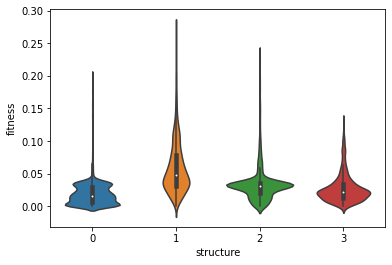

In [29]:
sns.violinplot(data=comparison_df, x="structure", y="fitness", order=["0", "1", "2", "3"])

Structure

<Axes: xlabel='behaviour', ylabel='fitness'>

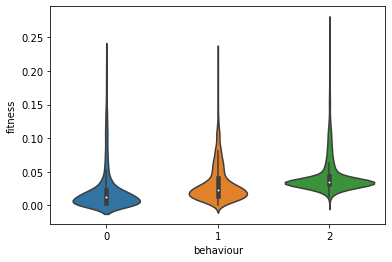

In [28]:
sns.violinplot(data=comparison_df, x="behaviour", y="fitness", order=["0", "1", "2"])

In [16]:
contingency_table = pd.crosstab(comparison_df["structure"], comparison_df["behaviour"], normalize="index")

<Axes: xlabel='behaviour', ylabel='structure'>

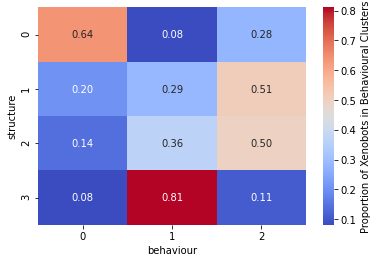

In [26]:
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"label": "Proportion of Xenobots in Behavioural Clusters"})


Make entire DS for kaggle

In [68]:
comparison_df

,structure,fitness,behaviour,id
0,0,0.038354,2,1
1,2,0.000000,0,2
2,0,0.015755,0,3
3,0,0.008543,1,4
4,2,0.036749,2,5
...,...,...,...,...
9995,1,0.024924,2,9996
9996,1,0.030516,2,9997
9997,1,0.125151,1,9998
9998,2,0.031412,2,9999


In [72]:
kaggle_df = df.drop(df.tail(40000).index, inplace=False)

kaggle_df

,2429,3266,578,315,4365,4858,3755,259,3954,2159,1583,4637,4873,1545,448,4492,1752,4156,2028,3845,2338,2932,4721,3549,3726,750,1864,2478,1537,1455,4266,1712,3556,3402,1862,2363,2963,4751,100,567,...,349,3664,4211,1306,2441,4609,739,1275,249,4381,1728,1434,2459,1165,2079,3326,2326,4797,143,2012,4706,2081,1046,538,4718,4482,1829,1111,3732,3763,1887,4743,2130,4527,4757,2275,2857,2539,2540,structure
0,2.0,12.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,3.0,5.0,6.0,79.0,5.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,3.0,3.0,4.0,2.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,5.0,3.0,11.0,55.0,21.0,3.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9998,2.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,2.0,1.0,2.0,9.0,4.0,5.0,90.0,8.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [75]:
kaggle_df = pd.concat([kaggle_df, df_behaviour], axis=1)

kaggle_df["behaviour"] = comparison_df["behaviour"]
kaggle_df["fitness"] = comparison_df["fitness"]
kaggle_df["id"] = comparison_df["id"]

kaggle_df

,2429,3266,578,315,4365,4858,3755,259,3954,2159,1583,4637,4873,1545,448,4492,1752,4156,2028,3845,2338,2932,4721,3549,3726,750,1864,2478,1537,1455,4266,1712,3556,3402,1862,2363,2963,4751,100,567,...,1111,3732,3763,1887,4743,2130,4527,4757,2275,2857,2539,2540,structure,behaviour,fitness,id,X1_real_part,X1_imaginary_part,X2_real_part,X2_imaginary_part,X3_real_part,X3_imaginary_part,X4_real_part,X4_imaginary_part,Y1_real_part,Y1_imaginary_part,Y2_real_part,Y2_imaginary_part,Y3_real_part,Y3_imaginary_part,Y4_real_part,Y4_imaginary_part,Z1_real_part,Z1_imaginary_part,Z2_real_part,Z2_imaginary_part,Z3_real_part,Z3_imaginary_part,Z4_real_part,Z4_imaginary_part
0,2.0,12.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,3.0,5.0,6.0,79.0,5.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,3.0,3.0,4.0,2.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0.038354,1,-6.678392,-0.0,-3.813635,3.005954,-0.350455,0.240680,-3.089813,-4.057545,-33.550251,-36.060602,-38.443789,12.618289,2.416319,29.696325,25.474944,-1.041319,-33.550251,36.060602,15.119171,46.437247,37.853622,5.996515,8.471582,-23.156516
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.000000,2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.015755,3,-4.795769,-0.0,-4.026720,1.472780,-2.320852,1.691419,-1.165671,0.358513,-10.120769,-19.201116,-18.474813,-7.801353,-16.208672,6.543446,-4.229451,14.842446,-10.120769,19.201116,2.968563,21.721470,13.603613,15.075739,16.741879,3.704786
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.008543,4,-19.392116,-0.0,-19.983327,0.510990,-21.513332,1.791514,-23.511298,4.409955,9.646888,-1.594062,8.886269,-1.105358,9.595054,0.154386,12.126948,1.085019,9.646888,1.594062,10.999838,0.589620,11.815608,-1.963056,11.260627,-5.516614
4,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,5.0,3.0,11.0,55.0,21.0,3.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.036749,5,-0.613462,-0.0,-1.970760,-2.589845,-4.760697,-2.906384,-6.358223,-0.939735,-21.263462,-45.559598,-43.314370,-20.649078,-41.803128,12.310863,-18.487917,33.909887,-21.263462,45.559598,11.177166,48.101227,34.934814,28.358522,37.687755,-0.056049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0.024924,9996,-13.493182,-0.0,-11.995158,4.547003,-8.017593,7.144504,-3.722165,6.207895,-21.087500,-27.111188,-29.176466,-22.430292,-36.774191,-11.200165,-38.493825,4.851192,-21.087500,27.111188,-16.858461,31.704628,-9.871497,39.666822,4.232678,46.485603
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0.030516

In [ ]:
kaggle_df.to_csv("behaviour-and-structure.csv", index=False)